In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#df=pd.read_pickle('classes.pkl')
df=pd.read_pickle('Classes2.pkl')
df

,Rule,Dead,T-Ratio_variance,Variation coefficient of A,(E_f-E_i)/std(E)
0,[0]-[1],0,202.437076,0.078109,8.838643
1,[0]-[2],0,23565.655702,0.028204,-9.631574
2,[0]-[3],0,18327.830725,0.092070,-8.544644
3,[0]-[4],1,20297.411685,0.144389,-5.124670
4,[0]-[5],1,NaN,0.157720,-4.047257
...,...,...,...,...,...
18146,"[8]-[0, 1, 2, 3, 5, 6, 7]",1,NaN,NaN,-2.121320
18147,"[8]-[0, 1, 2, 4, 5, 6, 7]",1,NaN,0.001398,-2.318230
18148,"[8]-[0, 1, 3, 4, 5, 6, 7]",1,NaN,0.004208,-2.714613
18149,"[8]-[0, 2, 3, 4, 5, 6, 7]",1,NaN,0.006252,-2.121320


In [3]:
T=df['T-Ratio_variance']
print(T.isna().sum())
A=df['Variation coefficient of A']
print(A.isna().sum())
C=df['(E_f-E_i)/std(E)']
print(C.isna().sum())
max(T)

3239
2704
110


4723937839.897756

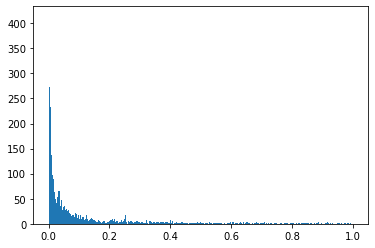

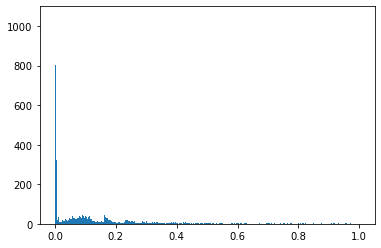

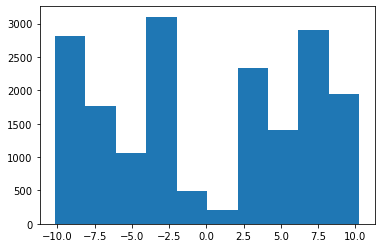

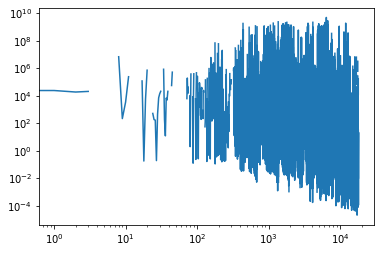

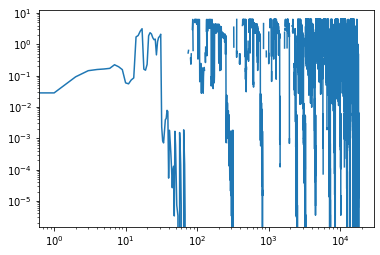

In [4]:
plt.hist(T,bins=1000,range=(0,1))
plt.show()
plt.hist(A,bins=1000,range=(0,1))
plt.show()
plt.hist(C,bins=10)
plt.show()

plt.loglog(T)
plt.show()
plt.loglog(A)
plt.show()

#x thresholdf
#y how many cases as a function of threshold
#check for jumps / sudden changes to justify threshold


In [5]:
cl = pd.DataFrame(columns=['Rule','Dead','Ideal','Equilibrium','Conservative'])
cl['Rule']=df['Rule']
cl['Dead']=df['Dead']
n=-1
for i in df['T-Ratio_variance']: 
    n=n+1
    if i<1:
        cl['Ideal'][n]=1
    else:
        cl['Ideal'][n]=0
    if df['Variation coefficient of A'][n]<0.1:
        cl['Equilibrium'][n]=1
    else:
        cl['Equilibrium'][n]=0
    if abs(df['(E_f-E_i)/std(E)'][n])<1:
        cl['Conservative'][n]=1
    else:
        cl['Conservative'][n]=0


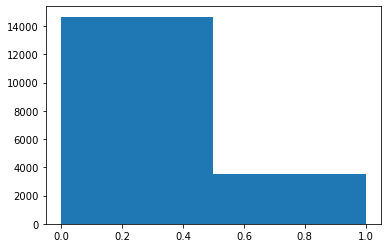

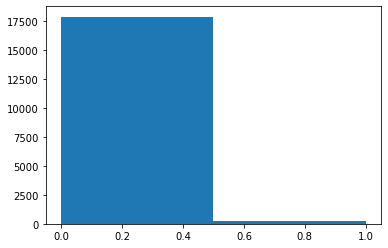

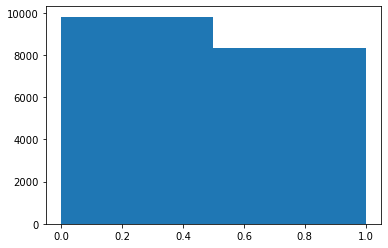

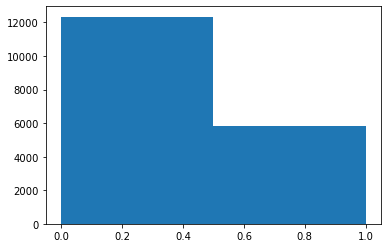

264

In [6]:
plt.hist(cl['Dead'],bins=2)
plt.show()
plt.hist(cl['Conservative'],bins=2)
plt.show()
plt.hist(cl['Ideal'],bins=2)
plt.show()
plt.hist(cl['Equilibrium'],bins=2)
plt.show()
np.sum(cl['Conservative'])

In [9]:
'''
Final classification:
Class A: Ideal gas at equilibrium
Class B: Ideal gas in non-equilibrium
Class C: Non-Ideal gas at equilibrum
Class D: Non-Ideal gas at non-equilibrium
Class E: Dead
'''
CL = pd.DataFrame(columns=['Rule','Class'])
CL['Rule']=cl['Rule']
for i in range(len(cl)): 
    if cl['Ideal'][i]==1 and cl['Equilibrium'][i]==1:
        CL['Class'][i]='A'
    if cl['Ideal'][i]==1 and cl['Equilibrium'][i]==0:
        CL['Class'][i]='B'
    if cl['Ideal'][i]==0 and cl['Equilibrium'][i]==1:
        CL['Class'][i]='C'
    if cl['Ideal'][i]==0 and cl['Equilibrium'][i]==0:
        CL['Class'][i]='D'
    if cl['Dead'][i]==1:
        CL['Class'][i]='E'
CL


,Rule,Class
0,[0]-[1],C
1,[0]-[2],C
2,[0]-[3],C
3,[0]-[4],E
4,[0]-[5],E
...,...,...
18146,"[8]-[0, 1, 2, 3, 5, 6, 7]",E
18147,"[8]-[0, 1, 2, 4, 5, 6, 7]",E
18148,"[8]-[0, 1, 3, 4, 5, 6, 7]",E
18149,"[8]-[0, 2, 3, 4, 5, 6, 7]",E


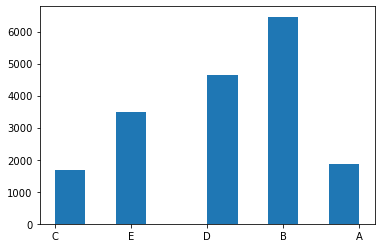

,Rule,Class
656,"[2, 4, 6]-[3]",D
658,"[2, 4, 6]-[7]",D
659,"[2, 4, 6]-[8]",D
662,"[2, 4, 7]-[3]",D
665,"[2, 4, 7]-[8]",D
668,"[2, 4, 8]-[3]",D
670,"[2, 4, 8]-[6]",D
671,"[2, 4, 8]-[7]",D
675,"[2, 5, 6]-[4]",D
677,"[2, 5, 6]-[8]",D


In [15]:
plt.hist(CL.Class)
plt.show()
D=CL[CL.Class=='D']
D[300:310]

In [24]:
CL.to_csv('classification.csv',sep=';')

In [1]:
#min(df['Variation coefficient of A'])
#CL[CL.Class=='A']
k=df[df['Variation coefficient of A']<0.1 ]
k=k[k['Variation coefficient of A']>0.01 ]
k=k[k['(E_f-E_i)/std(E)']>0 ]
r=k[k.Dead==0]
T=CL[CL['Rule']==('[3]-[0,1]')]
CL[Class=='D']

NameError: name 'df' is not defined

In [73]:
cl[cl['Conservative']==1]

,Rule,Dead,Ideal,Equilibrium,Conservative
54,[6]-[7],1,0,1,1
133,"[1, 2]-[7]",1,0,0,1
371,"[0, 2, 3]-[8]",1,0,0,1
388,"[0, 2, 6]-[7]",0,0,0,1
424,"[0, 3, 7]-[6]",0,0,0,1
...,...,...,...,...,...
17923,"[1, 7]-[0, 3, 4, 5, 6, 8]",0,0,0,1
17930,"[1, 8]-[0, 3, 4, 5, 6, 7]",0,0,0,1
17974,"[3, 4]-[0, 1, 2, 5, 6, 7]",0,1,1,1
18093,"[1]-[0, 3, 4, 5, 6, 7, 8]",0,0,0,1
